In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
0import numpy as np
import random
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.ndimage import gaussian_filter
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.ndimage
from random import randint
import matplotlib as mpl

In [ ]:
""" these fft definitions permit us to change the normalization with nct, if wished """
def fft(inarr,nct):
    finarr= np.fft.fftn(inarr)

    return (finarr)

def ifft(finarr,nct):
    inarr= np.fft.ifftn(finarr)

    return (inarr)

"""Function to obtain kx, ky and kz in the box (nc x nc x nc)"""
def k_squared(L,nc,i,j,k):

      kfac = 2.0*np.pi/L

      if i <= nc/2:
        kx = kfac*np.float64(i)
      else:
        kx = -kfac*np.float64(nc-i)
      if j <= nc/2:
        ky = kfac*np.float64(j)
      else:
        ky = -kfac*np.float64(nc-j)
      if k <= nc/2:
        kz = kfac*np.float64(k)
      else:
        kz = -kfac*np.float64(nc-k)
      k2 = kx**2+ky**2+kz**2

      return float(k2)

def pk1Dto3D(filename, nc, L, N_bin):

    # Theoretical Power Spectrum
    power = np.loadtxt(filename)
    kmodet = power[:,0]*1.00
    pkt = power[:,1]

    ktot = np.zeros((nc,nc,nc))

    for i in range(nc):
      for j in range(nc):
        for k in range(int(nc)):
          ktot[i,j,k] = np.sqrt(k_squared(L,nc,i,j,k))

    # Interpolation to obtain the power spectrum from the theoretical values
    pk = np.interp(ktot, kmodet, pkt)*nc**6/L**3

    return pk

def create_GaussianField(pk, seed, nc, norm):

# Gaussian field

    mu = 0.0
    sigma = 1.0

    gdis1D = np.random.normal(mu, sigma, nc**3)
    gdis = gdis1D.reshape(nc,nc,nc)

    # Gaussian field in fourier space
    fgdist = fft(gdis,nc**3)

    # We calculate the overdensity field by multiplying the gaussian field by the sqrt of the interpolated Pk

    fgdist.real*=np.sqrt(pk*norm)
    fgdist.imag*=np.sqrt(pk*norm)

    xg = ifft(fgdist,nc**3)
    xgr = xg.real

    return xgr


In [ ]:
def plotdiagn(inarr, mu, nc, L, N_bins, vmin, vmax, darkm, plotpk):

    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111)

    start=0
    end=1

    c=inarr[:,:,0]

    c = scipy.ndimage.zoom(c ,order=3, zoom=1)

    def truncate_colormap(cmap, minval=-4.0, maxval=1.0, n=100):
        new_cmap = colors.LinearSegmentedColormap.from_list(
          'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
          cmap(np.linspace(minval, maxval, n)))
        return new_cmap

    cmap = plt.get_cmap('bone_r')
    cmap = plt.get_cmap('nipy_spectral')
    cmap = plt.get_cmap('jet')

    cmap.set_under('w')

    im = plt.imshow(c,interpolation='bilinear',aspect='auto', extent=[0,L,0,L],cmap=cmap) #, vmin = vmin, vmax = vmax)
    plt.xlabel(r'$y[h^{-1}\,\mathrm{Mpc}]$',fontsize=25)
    plt.ylabel(r'$x[h^{-1}\,\mathrm{Mpc}]$',fontsize=25, labelpad=10)

    ax.set_aspect('equal')
    plt.setp(ax.get_xticklabels(), fontsize=18)
    plt.setp(ax.get_yticklabels(), fontsize=18)

    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("top", "5%", pad="1%")
    cb = plt.colorbar(im,orientation='horizontal',cax=cax)
    cb.ax.get_xaxis().labelpad = 0.
    cb.ax.xaxis.set_tick_params(labelsize=18)
    cb.ax.xaxis.set_ticks_position('top')

    plt.show()

plt.rcParams['figure.figsize'] = (15, 10)

In [ ]:
L = 100 # Box length [Mpc/h]
nc = 128 # Number of cells in one dimension
Nb = 100  # Number of bins
seed = 1
normDelta=1./np.float64(nc**3)

filename="/content/drive/My Drive/Pk.input_zinit_normalized_at_z0.dat"

pk=pk1Dto3D(filename, nc, L, Nb)

delta=create_GaussianField(pk, seed, nc, normDelta)

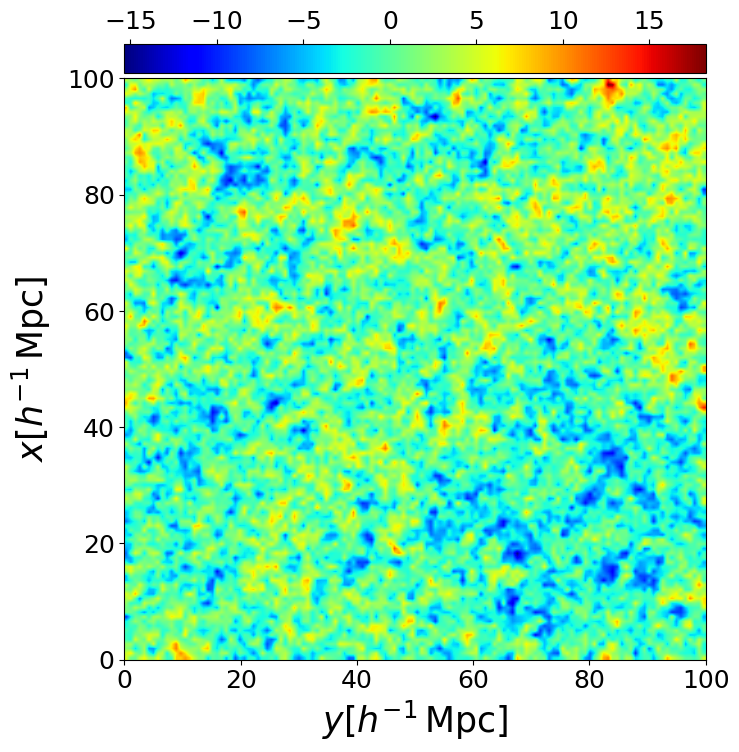

In [ ]:
plotdiagn(delta, 0, nc, L, Nb, 0, 0, False, False)
